## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Загружаем исходные данные

In [2]:
train = np.loadtxt('/kaggle/input/digit-recognizer/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('/kaggle/input/digit-recognizer/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape, test_img.shape

((42000, 28, 28), (28000, 28, 28))

## Визуализируем исходные данные

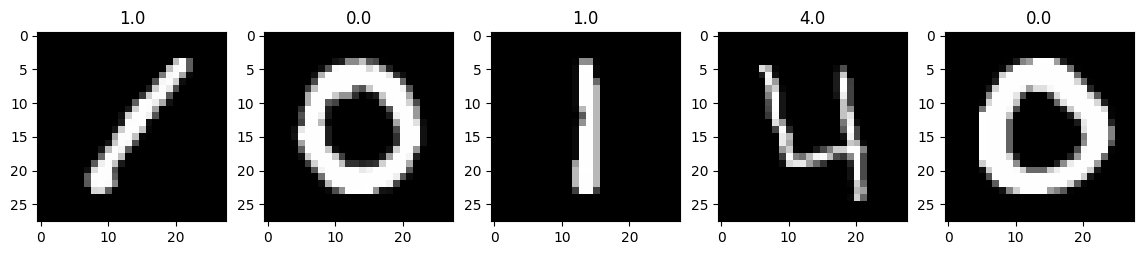

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## HOG

In [6]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

def get_hog(imgs):
    hog_data = np.zeros((imgs.shape[0], len(hog.compute(imgs[0].astype(np.uint8)))))

    for i, img in enumerate(imgs):
        hog_data[i] = hog.compute(np.uint8(img))
        
    return hog_data

## RandomForestClassifier

In [7]:
hog_train = get_hog(train_img)

y_train, y_val, x_train, x_val = train_test_split(
    train_label, hog_train, test_size=0.2,
    random_state=42)

model = RandomForestClassifier(n_estimators = 20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [8]:
pred_val = model.predict(x_val)

print('Accuracy: %s' % accuracy_score(y_val, pred_val))
print(classification_report(y_val, pred_val))

Accuracy: 0.96
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       816
         1.0       0.98      0.99      0.98       909
         2.0       0.94      0.97      0.95       846
         3.0       0.97      0.95      0.96       937
         4.0       0.97      0.96      0.97       839
         5.0       0.97      0.95      0.96       702
         6.0       0.98      0.98      0.98       785
         7.0       0.95      0.95      0.95       893
         8.0       0.95      0.93      0.94       835
         9.0       0.94      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



## Предсказания на тестовыйх данных

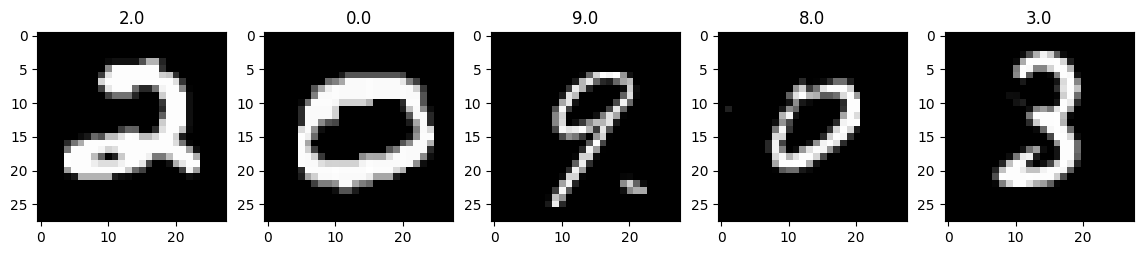

In [9]:
hog_train = get_hog(test_img)
pred_test = model.predict(hog_train)

fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

## Готовим файл для отправки

In [10]:
with open('submit.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test.astype(int), 1):
        dst.write('%s,%s\n' % (i, p))

In [11]:
!head submit.txt

ImageId,Label
1,2
2,0
3,9
4,8
5,3
6,7
7,0
8,3
9,0
